# DEPRESSION ANALYSIS

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("depression_data.csv")
df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'depression_data.csv'

In [ ]:
df['message'].iloc[:1]

0    just had a real good moment. i missssssssss hi...
Name: message, dtype: object

In [ ]:
df.columns

Index(['Unnamed: 0', 'message', 'label'], dtype='object')

In [ ]:
df = df.drop('Unnamed: 0',axis=1)

In [ ]:
df

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [ ]:
df.shape

(10314, 2)

### VISUALIZING THE DATA 

/Users/kanikaaapan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

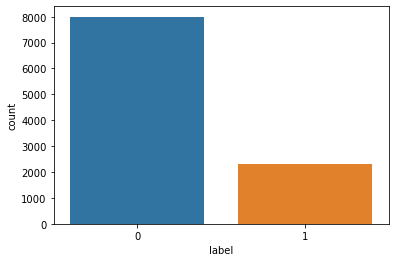

In [ ]:
sns.countplot(df['label']) 

## Data preprocessing: 
## 1. Convert to lower case
## 2. Do Lemmatization 

In [ ]:
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
wo = WordNetLemmatizer()
corpus=[]
for i in range(0,len(df)):
    message = re.sub('[^a-zA-Z]',' ',df['message'][i])
    message = message.lower()
    message = message.split()
    message = [wo.lemmatize(word) for word in message ]
    message = ' '.join(message)
    corpus.append(message)

In [ ]:
corpus[2]

'comeagainjen http twitpic com y lx http www youtube com watch v zogfqvh me'

### IMPORTING THE REQUIRED LIBRARIES FOR WORDS INITILIAZATION

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

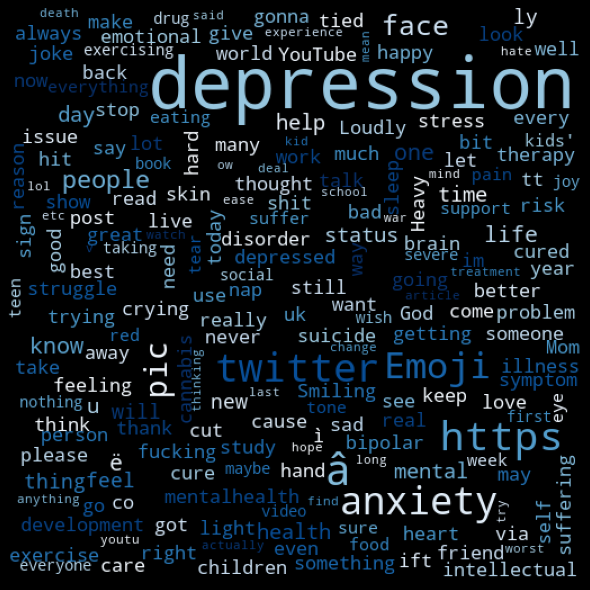

In [ ]:
depressive_words = ' '.join(list(df[df['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

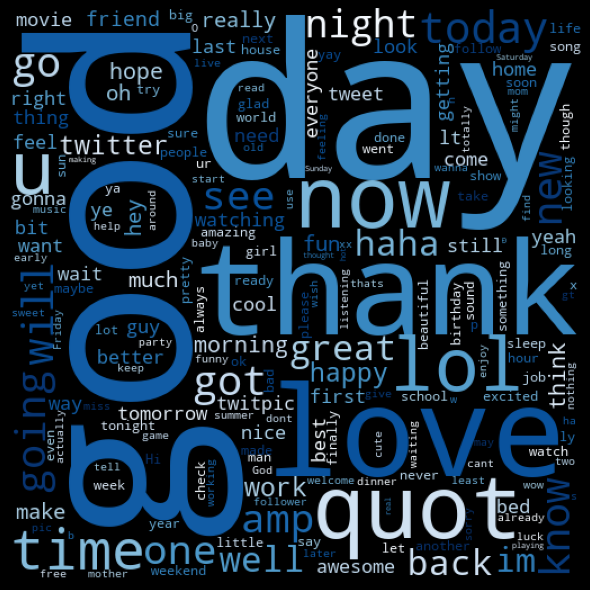

In [ ]:
positive_words = ' '.join(list(df[df['label'] == 0]['message']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

## Splitting training:testing into 75:25 ratio

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus,df['label'],test_size=0.25,random_state=42)

## Applying CountVectorizer for feature Extraction 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer( ngram_range=(1,3), stop_words='english',max_features=15000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [ ]:
X_train_vect.shape

(7735, 15000)

In [ ]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_resample(X_train_vect, y_train)
x_test_resample, y_test_resample = SMOTE().fit_resample(X_test_vect, y_test)
# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(11978, 15000)
(11978,)


In [ ]:
list(y_resample).count(1),list(y_resample).count(0)

(5989, 5989)

/Users/kanikaaapan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

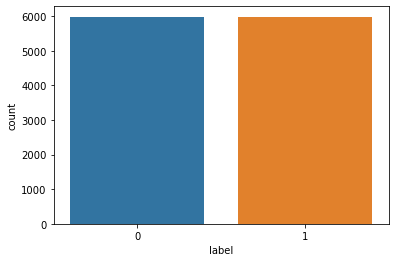

In [ ]:
sns.countplot(y_resample) 

### APPLYING LOGISTIC REGRESSION MODEL 

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(x_resample,y_resample)

LogisticRegression()

### CLASSIFICATION REPORT FOR CHECKING THE ACCURACY

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(x_test_resample)
print(accuracy_score(y_test_resample,y_pred))
print(classification_report(y_test_resample,y_pred))

0.9885629040278469
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2011
           1       1.00      0.98      0.99      2011

    accuracy                           0.99      4022
   macro avg       0.99      0.99      0.99      4022
weighted avg       0.99      0.99      0.99      4022



In [ ]:
print("on our model:",list(y_pred).count(1)/len(y_pred))
print("on actual:",list(y_test_resample).count(1)/len(y_test_resample))

on our model: 0.4895574341123819
on actual: 0.5


### APPLYING NAIVE BAYES MULTINOMIALNB MODEL 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_resample,y_resample)

MultinomialNB()

### CLASSIFICATION REPORT FOR CHECKING THE ACCURACY OF NAIVE BAYES MODEL

In [ ]:
y_pred = mnb.predict(x_test_resample)
print(accuracy_score(y_test_resample,y_pred))
print(classification_report(y_test_resample,y_pred))

0.9753853804077574
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2011
           1       0.98      0.97      0.98      2011

    accuracy                           0.98      4022
   macro avg       0.98      0.98      0.98      4022
weighted avg       0.98      0.98      0.98      4022



In [ ]:
print("on our model:",list(y_pred).count(1)/len(y_pred))
print("on actual:",list(y_test_resample).count(1)/len(y_test_resample))

on our model: 0.49676777722526105
on actual: 0.5


## Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_resample,y_resample)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(x_test_resample)
print(accuracy_score(y_test_resample,y_pred))
print(classification_report(y_test_resample,y_pred))

0.9880656389855793
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2011
           1       1.00      0.98      0.99      2011

    accuracy                           0.99      4022
   macro avg       0.99      0.99      0.99      4022
weighted avg       0.99      0.99      0.99      4022



In [ ]:
print("on our model:",list(y_pred).count(1)/len(y_pred))
print("on actual:",list(y_test_resample).count(1)/len(y_test_resample))

on our model: 0.49005469915464944
on actual: 0.5


## Random Forest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_resample,y_resample)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(x_test_resample)
print(accuracy_score(y_test_resample,y_pred))
print(classification_report(y_test_resample,y_pred))

0.9855793137742417
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2011
           1       1.00      0.97      0.99      2011

    accuracy                           0.99      4022
   macro avg       0.99      0.99      0.99      4022
weighted avg       0.99      0.99      0.99      4022



In [ ]:
print("on our model:",list(y_pred).count(1)/len(y_pred))
print("on actual:",list(y_test_resample).count(1)/len(y_test_resample))

on our model: 0.48707110890104427
on actual: 0.5


### FOR TAKING USER INPUT AND PREDICTION

In [ ]:
def preprocess(data):
    #preprocess
    a = re.sub('[^a-zA-Z]',' ',data)
    a = a.lower()
    a = a.split()
    a = [wo.lemmatize(word) for word in a ]
    a = ' '.join(a)  
    return a

In [ ]:
import re
strr = input('Enter Your Message: ')
print("-------------------------------")
examples = strr

a = preprocess(examples)

example_counts = vectorizer.transform([a])
prediction =mnb.predict(example_counts)
prediction[0]

if prediction[0]==0:
    print('Positive')
elif prediction[0]==1:
    print('Depressive')

In [ ]:
import pickle
filename = 'vectorizer.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))

In [ ]:
filename = 'prediction.pkl'
pickle.dump(mnb, open(filename, 'wb'))